## Observations and Insights 

Tumor volume is related to the body weight. The correlation shows that tumor volume increases with body weight
The data is generated taking into account various parameters that can affect the treatment results such as gender and weight

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns',None)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Combined data stored in df
df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'outer' )

# Display the data table for preview
print(len(df))
df.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice. Total 249 mice
df['Mouse ID'].nunique()

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df[['Mouse ID', 'Timepoint']].duplicated(keep='first')]
# mouse ID g989 has duplicated data in Timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = df[df['Mouse ID']=='g989']
duplicate_data
# duplicate data can be seen for this Mouse ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop(duplicate_data.index, inplace = True)
print(len(df))
# check to see if g989 is dropped
df[df['Mouse ID']=='g989']
# no data for this Mouse ID. confirms data is dropped

1880


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [15]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()
#Total mice is 248 after dropping one mouse from the data

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group= df.groupby('Drug Regimen')
summary_stats = pd.DataFrame()
summary_stats['Mean Tumor Volume']=regimen_group['Tumor Volume (mm3)'].mean()
summary_stats['Median Tumor Volume']= regimen_group['Tumor Volume (mm3)'].median()
summary_stats['Variance Tumor Volume'] = regimen_group['Tumor Volume (mm3)'].var()
summary_stats['SEM'] = regimen_group['Tumor Volume (mm3)'].sem()

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg =  regimen_group.agg({'Tumor Volume (mm3)':['mean','median','var','sem']})
summary_stats_agg

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice')

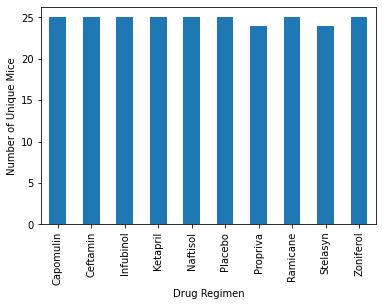

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_unique = regimen_group.nunique()
regimen_unique.plot(kind='bar',y='Mouse ID',legend = False)
plt.ylabel('Number of Unique Mice')


([<matplotlib.axis.XTick at 0x7f9c5a847af0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

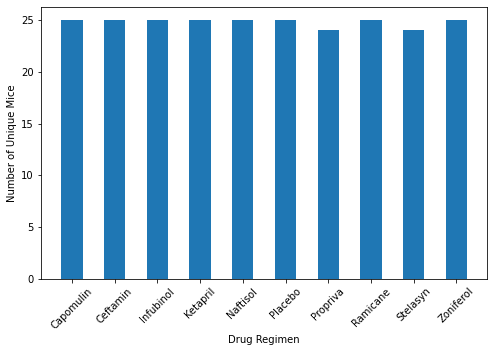

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
import numpy as np
fig,ax = plt.subplots(figsize = (8,5))
x_axis = np.arange(len(regimen_unique))
x_labels = regimen_unique.index
plt.bar(x_axis,regimen_unique['Mouse ID'],width = 0.5)
ax.set(ylabel = 'Number of Unique Mice',xlabel = 'Drug Regimen')
plt.xticks(x_axis,x_labels,rotation = 45)


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


<AxesSubplot:ylabel='Mouse ID'>

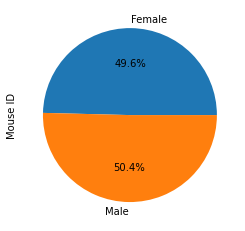

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female = df.groupby('Sex')['Mouse ID'].nunique()
print(male_female)
male_female.plot(kind='pie',autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7f9c5a7b1ee0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

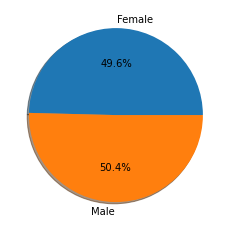

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female,  autopct="%1.1f%%", labels= ['Female','Male'], shadow=True)

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

group_mouse = df.groupby('Mouse ID')
final_tumor_volume_df = group_mouse.apply(lambda x: x[x['Timepoint']== x['Timepoint'].max()])
# print(final_tumor_volume_df.head())

result_df = final_tumor_volume_df[(final_tumor_volume_df['Drug Regimen'] =='Capomulin')|
                      (final_tumor_volume_df['Drug Regimen'] =='Ramicane') |
                      (final_tumor_volume_df['Drug Regimen'] =='Infubinol')|
                      (final_tumor_volume_df['Drug Regimen'] =='Ceftamin')]

result_df = result_df.sort_values('Drug Regimen')
result_df


,,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,,,
l897,1844,l897,45,38.846876,1,Capomulin,Male,17,19
j119,1764,j119,45,38.125164,1,Capomulin,Female,7,23
j246,1680,j246,35,38.753265,1,Capomulin,Female,21,21
u364,1754,u364,45,31.023923,3,Capomulin,Male,18,17
g316,1824,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...
j913,460,j913,45,31.560470,1,Ramicane,Female,4,17
j989,500,j989,45,36.134852,1,Ramicane,Male,8,19
k403,514,k403,45,22.050126,1,Ramicane,Male,21,16


In [45]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
treatments = result_df['Drug Regimen'].unique()
print(f' \ntreatments = {treatments}\n')

data_tumor_vol = pd.DataFrame()
for drug in treatments:
    data_tumor_vol[drug] = result_df[result_df['Drug Regimen']== drug]['Tumor Volume (mm3)'].values   
    
print('-------Tumor Volume Data for each treatment --------')
print(data_tumor_vol)
quartile  = data_tumor_vol.quantile([0.25, 0.5, 0.75])
print('\n-----------Quartiles Q1, Q2, Q3 --------------------')
print(quartile)

IQR = quartile.iloc[2,:]-quartile.iloc[0,:]
LowerBound = quartile.iloc[0,:] - 1.5*IQR
UpperBound = quartile.iloc[2,:] + 1.5*IQR
print('\n-------------Interquartile Range -----------------')
print(IQR)

print('\n-------------Lower Bound ---------------------')
print(LowerBound)

print('\n-------------Upper Bound ---------------------')
print(UpperBound)
data_tumor_vol.describe()

#outliers below Lower Bound(LB) and above Upper Bound (UB)
outlier_LB = pd.DataFrame()
outlier_UB = pd.DataFrame()
for drug in treatments:
    outlier_LB[drug]=data_tumor_vol.loc[data_tumor_vol[drug]<LowerBound[drug],drug]
    outlier_UB[drug]=data_tumor_vol.loc[data_tumor_vol[drug]>UpperBound[drug],drug]

print('\n--------No outliers above Upper Bound -----------')
print(outlier_UB)

print('\n--------outliers below Lower Bound -----------')
print(outlier_LB)
print('\n-------only Infubinol has an outlier as confirmed by box plot in the next section')


 
treatments = ['Capomulin' 'Ceftamin' 'Infubinol' 'Ramicane']

-------Tumor Volume Data for each treatment --------
    Capomulin   Ceftamin  Infubinol   Ramicane
0   38.846876  64.192341  50.005138  30.276232
1   38.125164  61.849023  55.650681  38.407618
2   38.753265  46.784535  51.542431  43.047543
3   31.023923  68.923185  54.048608  44.183451
4   40.159220  64.299830  67.685569  38.810366
5   37.074024  59.851956  46.250112  31.095335
6   30.485985  67.748662  54.656549  32.978522
7   34.455298  45.000000  58.268442  45.220869
8   40.728578  57.918381  67.973419  36.561652
9   40.658124  47.784682  55.629428  43.166373
10  39.952347  45.000000  65.525743  38.342008
11  23.343598  64.729837  57.031862  33.397653
12  47.685963  62.999356  66.083066  37.311236
13  36.041047  68.594745  72.226731  37.225650
14  37.311846  61.386660  36.321346  40.659006
15  32.377357  64.634949  60.969711  43.419381
16  38.939633  45.000000  62.435404  30.638696
17  33.329098  56.057749  60.918767  

Text(0, 0.5, 'Tumor Volume (mm3)')

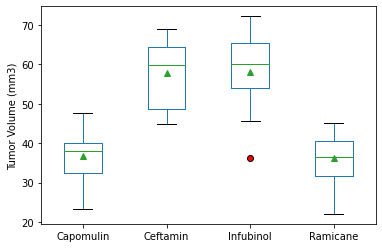

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_tumor_vol.boxplot(column = list(treatments),grid=False, showmeans=True, flierprops=dict(markerfacecolor='red'))
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

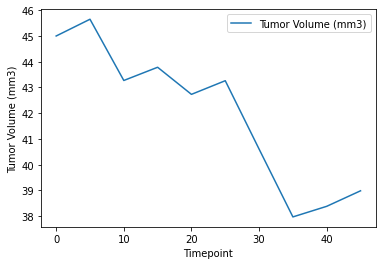

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_b128 = df[(df['Drug Regimen'] =='Capomulin')& (df['Mouse ID']=='b128')]
mouse_b128
mouse_b128.plot('Timepoint','Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

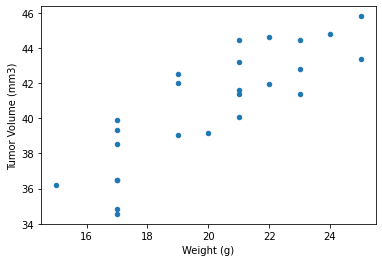

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_data = df.groupby(['Drug Regimen','Mouse ID']).mean()
average_data.loc["Capomulin"].plot.scatter(x= 'Weight (g)',y= 'Tumor Volume (mm3)')

## Correlation and Regression


---------------------------------------------
Correlation Coefficient = 0.84
---------------------------------------------


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

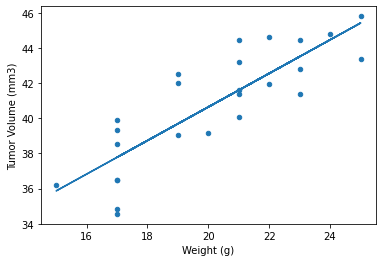

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, corr_coeff, pval, stderr) = st.linregress(average_data.loc['Capomulin','Weight (g)'], average_data.loc['Capomulin','Tumor Volume (mm3)'])
print('\n---------------------------------------------')
print(f'Correlation Coefficient = {round(corr_coeff,2)}')
print('---------------------------------------------')
ydata = slope*average_data.loc['Capomulin','Weight (g)'] + intercept
fig,ax = plt.subplots()
plt.plot(average_data.loc['Capomulin','Weight (g)'],ydata)
average_data.loc["Capomulin"].plot.scatter(x= 'Weight (g)',y= 'Tumor Volume (mm3)', ax = ax)
